In [1]:
import numpy as np
import plotly.express as px
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import seaborn as sns



# FEM vs. FVM

In [2]:
x=np.linspace(0,2,500)

k=0.5
q=100
u0=100
u2=200

deltaDir=u2-u0





## FEM

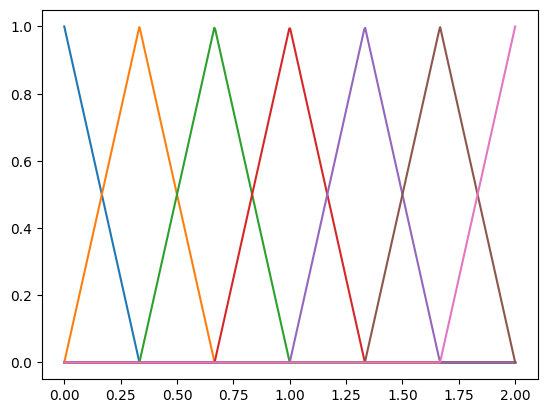

In [3]:
###############################
#
#   FEM
#
###############################


knotenAbstand=1/3.

def N(i,x):
    
    if i==0:
        if x >=0 and x<1/3.:
            wert=1-3*x
        else:
            wert=0
    elif i==2:
        if x >5/3. and x<=2:
            wert=3*(x-5/3.)
        else:
            wert=0
    else:
        if x >=i-1/3. and x<i:
            wert=3*(x-(i-1/3.))
        elif x>=i and x<i+1/3.:
             wert=1-3*(x-i)        
        else:
            wert=0    
            
            
    return wert        
                

                               
                
def Nh(i):

    NF=[]
    for j in x:
        NF.append(N(i,j))

    return np.asarray(NF)    

    
#plt.plot(x,Nh(0),x,Nh(1/2.),x,Nh(1),x,Nh(3/2.),x,Nh(2))

plt.plot(x,Nh(0),x,Nh(1/3.),x,Nh(2/3.),x,Nh(1),x,Nh(4/3.),x,Nh(5/3.),x,Nh(2))


plt.show()

penalty=10**7

K=np.array([[penalty*1/2.,-1,0,0,0,0,0],
            [-1,2,-1,0,0,0,0],
            [0,-1,2,-1,0,0,0],
            [0,0,-1,2,-1,0,0],
            [0,0,0,-1,2,-1,0],
            [0,0,0,0,-1,2,-1],
            [0,0,0,0,0,-1,penalty*1/2.]])

#F=knotenAbstand**2*q/(k)*np.ones(5)

F=knotenAbstand**2*q/(k)*np.array([0,1,1,1,1,1,0])+np.array([penalty*u0/2.,0,0,0,0,0,penalty*u2/2.])



U=np.linalg.solve(K,F)



detK=np.linalg.det(K)



u=U[0]*Nh(0)+U[1]*Nh(1/3.)+U[2]*Nh(2/3.)+U[3]*Nh(1)+U[4]*Nh(4/3.)+U[5]*Nh(5/3.)+U[6]*Nh(2)




#print u0*Nh(0)

def uAna(x):
    wertVektor=[]
    for i in x:
         wert=(deltaDir/2.+(q*(2-i))/(2.*k))*i+u0
         #wert=50+q*(2-i)
         wertVektor.append(wert)

    return wertVektor

   
#y=uAna(x)   
#print uAna(x)   
    
#plt.plot(x,uAna(x),x,u)

#plt.show()




## FVM

In [4]:
###############################
#
#   FVM
#
###############################



NumberOfVolumes=5
volumeLength=2./NumberOfVolumes

K_FVM=np.array([[3,-1,0,0,0],
            [-1,2,-1,0,0],
            [0,-1,2,-1,0],
            [0,0,-1,2,-1],
            [0,0,0,-1,3]])

#F=knotenAbstand**2*q/(k)*np.ones(5)

F_FVM=volumeLength**2*q/(k)*np.array([1,1,1,1,1])+np.array([2*u0,0,0,0,2*u2])



U_FVM=np.linalg.solve(K_FVM,F_FVM)

U_FVM_gesamt=np.array([u0,U_FVM[0],U_FVM[1],U_FVM[2],U_FVM[3],U_FVM[4],u2])



x_FVM = np.array([0,0.2,0.6,1,1.4,1.8,2])









## Comparison: FEM exact on nodes and FVM exact at gradients bewteen nodes

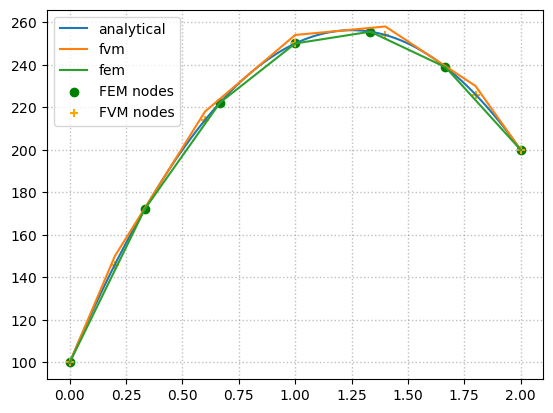

In [5]:

nodes = np.array([0, 1/3., 2*1/3., 3*1/3., 4*1/3, 5*1/3, 6*1/3])

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.plot(x,uAna(x),label='analytical')
plt.plot(x_FVM,U_FVM_gesamt,label='fvm')
plt.plot(x,u,label='fem')
plt.scatter(nodes, uAna(nodes), label='FEM nodes', color = 'green')
plt.scatter(x_FVM, uAna(x_FVM), label='FVM nodes', color = 'orange', marker='+')
plt.legend(loc=2)
ax.grid(color='grey', linestyle=':', linewidth=1, alpha=0.5)
plt.show()
